# Graph Examples

In [10]:
import networkx as nx
import dgl
%matplotlib inline
import matplotlib.pyplot as plt
import torch as th

NetworkX is a Python package for the creation, manipulation, and study of the structure, 
dynamics, and functions of complex networks

## Example 1

(0, 0) (1, 0) (0, 1)
(0, 1) (1, 1) (0, 2)
(0, 2) (1, 2) (0, 3)
(0, 3) (1, 3) (0, 4)
(0, 4) (1, 4)
(1, 0) (2, 0) (1, 1)
(1, 1) (2, 1) (1, 2)
(1, 2) (2, 2) (1, 3)
(1, 3) (2, 3) (1, 4)
(1, 4) (2, 4)
(2, 0) (3, 0) (2, 1)
(2, 1) (3, 1) (2, 2)
(2, 2) (3, 2) (2, 3)
(2, 3) (3, 3) (2, 4)
(2, 4) (3, 4)
(3, 0) (4, 0) (3, 1)
(3, 1) (4, 1) (3, 2)
(3, 2) (4, 2) (3, 3)
(3, 3) (4, 3) (3, 4)
(3, 4) (4, 4)
(4, 0) (4, 1)
(4, 1) (4, 2)
(4, 2) (4, 3)
(4, 3) (4, 4)
(4, 4)


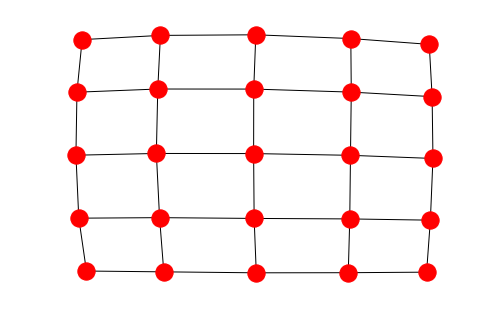

In [94]:
# https://networkx.github.io/documentation/stable 
import sys
import matplotlib.pyplot as plt
import networkx as nx

G = nx.grid_2d_graph(5, 5)  # 5x5 grid

# print the adjacency list
for line in nx.generate_adjlist(G):
    print(line)
# write edgelist to grid.edgelist
nx.write_edgelist(G, path="grid.edgelist", delimiter=":")
# read edgelist from grid.edgelist
H = nx.read_edgelist(path="grid.edgelist", delimiter=":")

nx.draw(H)
plt.show()

## Example 2

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson

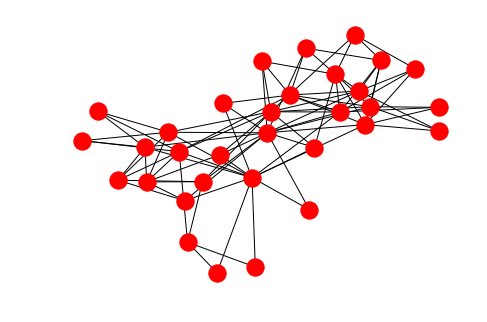

In [95]:
# https://networkx.github.io/documentation/stable

import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite

G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w), w))

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w, weight='weight'), w))

nx.draw(G)
plt.show()

## Example 3

In [2]:
g_nx = nx.petersen_graph()
g_dgl = dgl.DGLGraph(g_nx)

In [3]:
g_nx

In [4]:
g_dgl

DGLGraph(num_nodes=10, num_edges=30,
         ndata_schemes={}
         edata_schemes={})

In [5]:
g_dgl.edges()

(tensor([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7,
         8, 8, 8, 9, 9, 9]),
 tensor([1, 4, 5, 0, 2, 6, 1, 3, 7, 2, 4, 8, 0, 3, 9, 0, 7, 8, 1, 8, 9, 2, 5, 9,
         3, 5, 6, 4, 6, 7]))

In [13]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%pylab inline 
pylab.rcParams['figure.figsize'] = (15,10)

Populating the interactive namespace from numpy and matplotlib


***They are the same graph, except that DGLGraph is always directional***

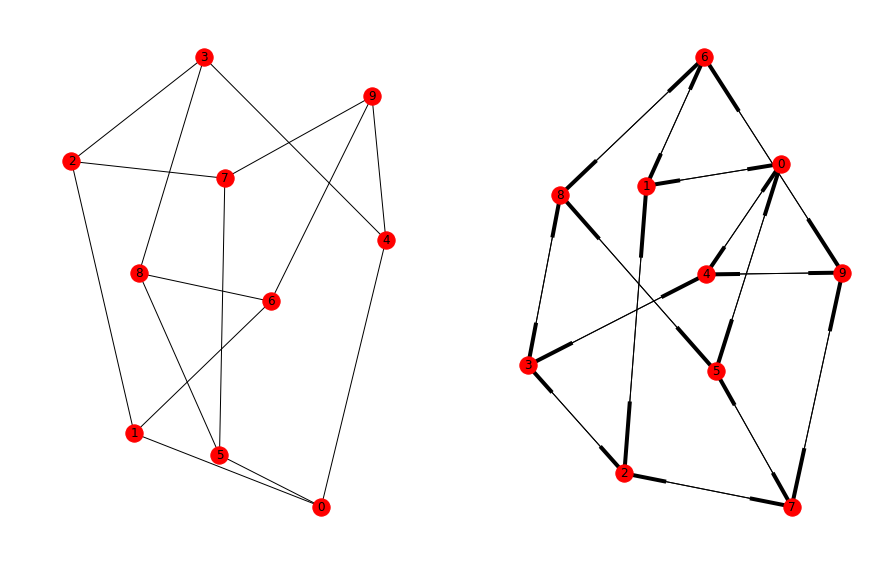

In [21]:
import matplotlib.pyplot as plt
plt.subplot(121)
nx.draw(g_nx, with_labels=True)
plt.subplot(122)
nx.draw(g_dgl.to_networkx(), with_labels=True)
plt.show()

# Graph Creation

*** We can also create a graph by calling DGL’s own interface.*** 

The graph stores 
- Nodes 
- Edges 
- Features
 

In [4]:
import dgl
import torch as th

## Adding  Nodes

We can use:
- add_nodes()

In [148]:
g1 = dgl.DGLGraph()

In [149]:
print(g1)
print("\n The Type of g1 is: %s" % type(g1))

DGLGraph(num_nodes=0, num_edges=0,
         ndata_schemes={}
         edata_schemes={})

 The Type of g1 is: <class 'dgl.graph.DGLGraph'>


In [150]:
g1.add_nodes(10)  # 10 isolated nodes are added

In [147]:
g1.clear()

In [151]:
g1

DGLGraph(num_nodes=10, num_edges=0,
         ndata_schemes={}
         edata_schemes={})

In [152]:
g.nodes()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

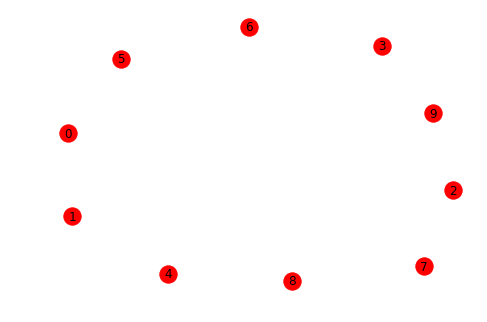

In [153]:
nx.draw(g1.to_networkx(), with_labels=True)
plt.show()

## Adding Edges

Edges:

(1) We can add one edge at a time G.add_edge(0, 1)

(2) Multiple edges G.add_edges([1, 2, 3], [3, 4, 5]) # three edges: 1->3, 2->4, 3->5

(3) Multiple edges starting from the same node G.add_edges(4, [7, 8, 9]) # three edges: 4->7, 4->8, 4->9

(4) Multiple edges pointing to the same node G.add_edges([2, 6, 8], 5) # three edges: 2->5, 6->5, 8->5

(5) Multiple edges using tensor type import torch as th G.add_edges(th.tensor([3, 4, 5]), 1) # three edges: 3->1, 4->1, 5->1


***To add edges we can use-***

- add_edges()


In [154]:
# a couple edges one-by-one
for i in range(1, 5):
    g1.add_edge(i, 0)

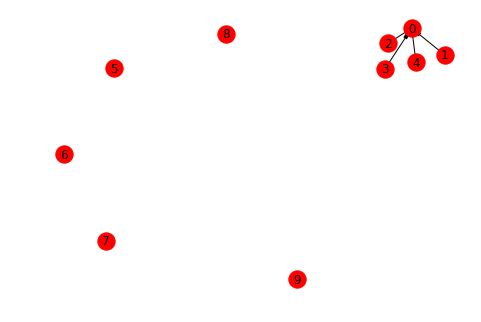

In [155]:
nx.draw(g1.to_networkx(), with_labels=True)
plt.show()

In [156]:
# a few more with a paired list
src = list(range(5, 8)); dst = [0]*3

In [157]:
print(src)
print(dst)

[5, 6, 7]
[0, 0, 0]


In [158]:
g1.add_edges(src, dst)

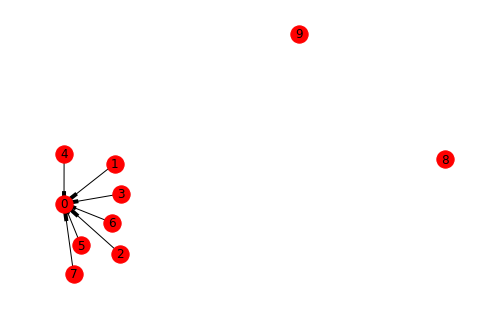

In [159]:
nx.draw(g1.to_networkx(), with_labels=True)
plt.show()

In [160]:
# finish with a pair of tensors
src = th.tensor([8, 9]); dst = th.tensor([0, 0])

In [161]:
print(src)
print(dst)

tensor([8, 9])
tensor([0, 0])


In [162]:
g1.add_edges(src, dst)

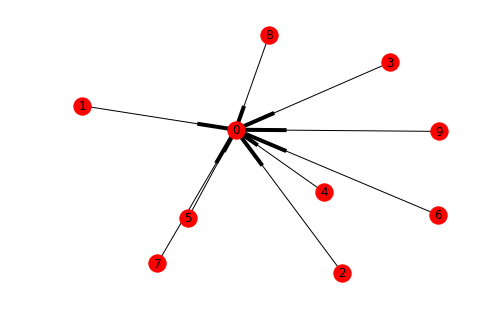

In [163]:
nx.draw(g1.to_networkx(), with_labels=True)
plt.show()

In [174]:
g1.edges()

(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0]))

*** Another Way of adding edges -   EDGE   BROADCASTING*** 

In [165]:
# Creating new graph
g2 = dgl.DGLGraph()
g2.add_nodes(12)

In [166]:
# edge broadcasting will do star graph in one go!
src = th.tensor(list(range(1, 12)));
print(src)

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])


In [167]:
g2.add_edges(src, 0)
print(g2.edges())

(tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


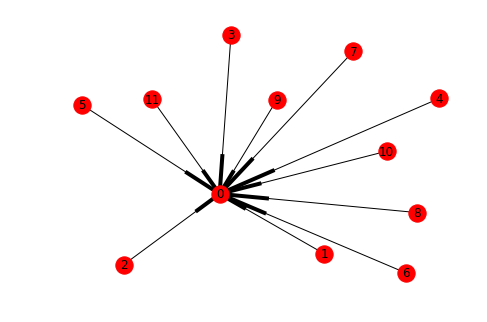

In [168]:
nx.draw(g2.to_networkx(), with_labels=True)
plt.show()


## Features Assignment

We can assign features to both the nodes and the edges.



*** Features are stored as key/value pair.*** 

The key must be hashable while the value must be tensor type. Features are batched on the first dimension.

**The features are represented as dictionary of names (strings) and tensors, called fields. **

The goal is:

- Assigning features to Nodes.
- Assigning features to Edges


###  Assigning Features to Nodes

In [41]:
import dgl
import torch as th

In [175]:
x = th.randn(12, 4)

In [176]:
x

tensor([[ 0.4107,  0.0175, -0.0517,  0.9448],
        [ 0.6453,  0.4029,  1.0961, -0.0815],
        [ 0.7945,  0.6974, -1.2279,  1.5092],
        [-0.0271,  0.7427, -0.4551, -0.3473],
        [-0.1736, -0.3501, -0.3082, -0.0558],
        [ 1.6859,  0.4331,  0.3631,  1.2155],
        [ 0.4617, -1.2481,  1.2746,  0.9800],
        [ 1.0110,  0.7832,  1.0207, -1.2206],
        [-0.1224, -0.5525,  1.9635,  0.6966],
        [ 0.4920, -0.1199, -0.8007,  0.1306],
        [-1.0080,  0.3528, -1.3071,  0.2578],
        [ 1.0195, -0.4514,  0.4564, -0.0191]])

*** We can use G.ndata to get/set features for all nodes  ***

**ndata** is a syntax sugar to access states of all nodes,states are stored in a container data that hosts user defined dictionary

In [177]:
g2  

DGLGraph(num_nodes=12, num_edges=11,
         ndata_schemes={}
         edata_schemes={})

In [178]:
g2.ndata['x'] = x

Notice the Difference in the node schemes.

In [179]:
g2

DGLGraph(num_nodes=12, num_edges=11,
         ndata_schemes={'x': Scheme(shape=(4,), dtype=torch.float32)}
         edata_schemes={})

In [184]:
g2.ndata['x']

tensor([[ 0.4107,  0.0175, -0.0517,  0.9448],
        [ 0.6453,  0.4029,  1.0961, -0.0815],
        [ 0.7945,  0.6974, -1.2279,  1.5092],
        [-0.0271,  0.7427, -0.4551, -0.3473],
        [-0.1736, -0.3501, -0.3082, -0.0558],
        [ 1.6859,  0.4331,  0.3631,  1.2155],
        [ 0.4617, -1.2481,  1.2746,  0.9800],
        [ 1.0110,  0.7832,  1.0207, -1.2206],
        [-0.1224, -0.5525,  1.9635,  0.6966],
        [ 0.4920, -0.1199, -0.8007,  0.1306],
        [-1.0080,  0.3528, -1.3071,  0.2578],
        [ 1.0195, -0.4514,  0.4564, -0.0191]])

In [182]:
g2.nodes[:].data['x']

tensor([[ 0.4107,  0.0175, -0.0517,  0.9448],
        [ 0.6453,  0.4029,  1.0961, -0.0815],
        [ 0.7945,  0.6974, -1.2279,  1.5092],
        [-0.0271,  0.7427, -0.4551, -0.3473],
        [-0.1736, -0.3501, -0.3082, -0.0558],
        [ 1.6859,  0.4331,  0.3631,  1.2155],
        [ 0.4617, -1.2481,  1.2746,  0.9800],
        [ 1.0110,  0.7832,  1.0207, -1.2206],
        [-0.1224, -0.5525,  1.9635,  0.6966],
        [ 0.4920, -0.1199, -0.8007,  0.1306],
        [-1.0080,  0.3528, -1.3071,  0.2578],
        [ 1.0195, -0.4514,  0.4564, -0.0191]])

In [183]:
g2.ndata

{'x': tensor([[ 0.4107,  0.0175, -0.0517,  0.9448],
        [ 0.6453,  0.4029,  1.0961, -0.0815],
        [ 0.7945,  0.6974, -1.2279,  1.5092],
        [-0.0271,  0.7427, -0.4551, -0.3473],
        [-0.1736, -0.3501, -0.3082, -0.0558],
        [ 1.6859,  0.4331,  0.3631,  1.2155],
        [ 0.4617, -1.2481,  1.2746,  0.9800],
        [ 1.0110,  0.7832,  1.0207, -1.2206],
        [-0.1224, -0.5525,  1.9635,  0.6966],
        [ 0.4920, -0.1199, -0.8007,  0.1306],
        [-1.0080,  0.3528, -1.3071,  0.2578],
        [ 1.0195, -0.4514,  0.4564, -0.0191]])}

In [185]:
print(g2.ndata['x'] == g2.nodes[:].data['x'])

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]], dtype=torch.uint8)


In [199]:
g2.nodes()

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

** How to access or change features for few nodes only? **

- We can use G.nodes to get/set features for some nodes.

In [207]:
# we can access node set with integer, list, or integer tensor
g2.nodes[11].data['x'] = th.zeros(1,4)
g2.nodes[[0,2]].data['x'] = th.ones((2,4))
g2.nodes[th.tensor([4, 6])].data['x'] = th.zeros(2, 4)

In [208]:
g2.ndata ## Returns the data view of all the nodes.

{'x': tensor([[ 1.0000,  1.0000,  1.0000,  1.0000],
        [ 0.6453,  0.4029,  1.0961, -0.0815],
        [ 1.0000,  1.0000,  1.0000,  1.0000],
        [-0.0271,  0.7427, -0.4551, -0.3473],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 1.6859,  0.4331,  0.3631,  1.2155],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 1.0110,  0.7832,  1.0207, -1.2206],
        [-0.1224, -0.5525,  1.9635,  0.6966],
        [ 0.4920, -0.1199, -0.8007,  0.1306],
        [-1.0080,  0.3528, -1.3071,  0.2578],
        [ 0.0000,  0.0000,  0.0000,  0.0000]])}

###  Assigning Features to edges

Assigning edge features is in a similar fashion to that of node features,
except that one can also do it by specifying endpoints of the edges.

** Like G.ndata for nodes,  we can use G.edata and G.edges to get/set features for edges**

In [211]:
g2

DGLGraph(num_nodes=12, num_edges=11,
         ndata_schemes={'x': Scheme(shape=(4,), dtype=torch.float32)}
         edata_schemes={})

In [214]:
g2.edata['y'] = th.randn(11, 2)

In [216]:
g2

DGLGraph(num_nodes=12, num_edges=11,
         ndata_schemes={'x': Scheme(shape=(4,), dtype=torch.float32)}
         edata_schemes={'y': Scheme(shape=(2,), dtype=torch.float32)})

In [217]:
g2.edata

{'y': tensor([[ 0.2317,  0.8616],
        [-0.3544, -0.3694],
        [ 1.1410, -0.9225],
        [ 0.5164, -0.9137],
        [ 0.9743, -0.4021],
        [ 0.8819, -0.7570],
        [-0.0028,  0.3236],
        [-1.3346, -0.7021],
        [-0.5053, -0.0532],
        [-0.3194, -1.2958],
        [ 0.6789,  0.8483]])}

In [240]:
# We can also access the edges by giving endpoints
g2.edges[[1, 2, 3], [0, 0, 0]].data['w'] = th.ones(3, 2) # edges [1, 2, 3] -> 0

C:\Users\Administrator\Anaconda3\lib\site-packages\dgl\base.py:18: UserWarning: Initializer is not set. Use zero initializer instead. To suppress this warning, use `set_initializer` to explicitly specify which initializer to use.
  warnings.warn(msg)


In [241]:
g2.edata

{'y': tensor([[ 2.2317e+00,  2.8616e+00],
        [-2.3544e+00, -2.3694e+00],
        [ 1.1410e+00, -9.2246e-01],
        [ 5.1638e-01, -9.1368e-01],
        [ 9.7433e-01, -4.0210e-01],
        [ 8.8191e-01, -7.5702e-01],
        [-2.8265e-03,  3.2365e-01],
        [-1.3346e+00, -7.0212e-01],
        [-5.0535e-01, -5.3175e-02],
        [-3.1942e-01, -1.2958e+00],
        [ 6.7888e-01,  8.4826e-01]]), 'w': tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])}

In [242]:
g2.edges[[1, 2, 3], [0, 0, 0]].data['y'] = th.ones(3, 2) # edges [1, 2, 3] -> 0

In [243]:
g2.edata

{'y': tensor([[ 1.0000,  1.0000],
        [ 1.0000,  1.0000],
        [ 1.0000,  1.0000],
        [ 0.5164, -0.9137],
        [ 0.9743, -0.4021],
        [ 0.8819, -0.7570],
        [-0.0028,  0.3236],
        [-1.3346, -0.7021],
        [-0.5053, -0.0532],
        [-0.3194, -1.2958],
        [ 0.6789,  0.8483]]), 'w': tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])}

In [244]:
g2

DGLGraph(num_nodes=12, num_edges=11,
         ndata_schemes={'x': Scheme(shape=(4,), dtype=torch.float32)}
         edata_schemes={'y': Scheme(shape=(2,), dtype=torch.float32), 'w': Scheme(shape=(2,), dtype=torch.float32)})

In [245]:
g2.edges[[1, 2, 3], [0, 0, 0]].data['z'] = th.ones(3, 4) # edges [1, 2, 3] -> 0

In [246]:
g2.edata

{'y': tensor([[ 1.0000,  1.0000],
        [ 1.0000,  1.0000],
        [ 1.0000,  1.0000],
        [ 0.5164, -0.9137],
        [ 0.9743, -0.4021],
        [ 0.8819, -0.7570],
        [-0.0028,  0.3236],
        [-1.3346, -0.7021],
        [-0.5053, -0.0532],
        [-0.3194, -1.2958],
        [ 0.6789,  0.8483]]), 'w': tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]), 'z': tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])}

In [247]:
g2

DGLGraph(num_nodes=12, num_edges=11,
         ndata_schemes={'x': Scheme(shape=(4,), dtype=torch.float32)}
         edata_schemes={'y': Scheme(shape=(2,), dtype=torch.float32), 'w': Scheme(shape=(2,), dtype=torch.float32), 'z': Scheme(shape=(4,), dtype=torch.float32)})

**We can also remove node/edge states from the graph. **

In [248]:
g2.ndata.pop('x')
g2.edata.pop('w')

tensor([[ 1.0000,  1.0000,  1.0000,  1.0000],
        [ 0.6453,  0.4029,  1.0961, -0.0815],
        [ 1.0000,  1.0000,  1.0000,  1.0000],
        [-0.0271,  0.7427, -0.4551, -0.3473],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 1.6859,  0.4331,  0.3631,  1.2155],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 1.0110,  0.7832,  1.0207, -1.2206],
        [-0.1224, -0.5525,  1.9635,  0.6966],
        [ 0.4920, -0.1199, -0.8007,  0.1306],
        [-1.0080,  0.3528, -1.3071,  0.2578],
        [ 0.0000,  0.0000,  0.0000,  0.0000]])

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])

In [249]:
g2

DGLGraph(num_nodes=12, num_edges=11,
         ndata_schemes={}
         edata_schemes={'y': Scheme(shape=(2,), dtype=torch.float32), 'z': Scheme(shape=(4,), dtype=torch.float32)})

#  Multi Graph

Many graph applications need multi-edges. To enable this, construct DGLGraph with **multigraph=True**

In [251]:
g_multi = dgl.DGLGraph(multigraph=True)
g_multi.add_nodes(10)
g_multi.ndata['x'] = th.randn(10, 2)

In [253]:
g_multi.add_edges(list(range(1, 10)), 0)
g_multi.add_edge(1, 0) # two edges on 1->0

In [254]:
g_multi

DGLGraph(num_nodes=10, num_edges=10,
         ndata_schemes={'x': Scheme(shape=(2,), dtype=torch.float32)}
         edata_schemes={})

In [255]:
g_multi.edata['w'] = th.randn(10, 2)
g_multi.edges[1].data['w'] = th.zeros(1, 2)
print(g_multi.edges())

(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 1]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


In [256]:
g_multi

DGLGraph(num_nodes=10, num_edges=10,
         ndata_schemes={'x': Scheme(shape=(2,), dtype=torch.float32)}
         edata_schemes={'w': Scheme(shape=(2,), dtype=torch.float32)})

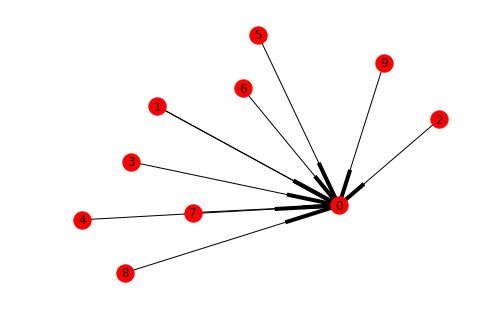

In [258]:
nx.draw(g_multi.to_networkx(), with_labels=True)
plt.show()

An edge in multi-graph cannot be uniquely identified using its incident nodes u and v; 
query their edge ids use edge_id interface.

In [259]:
eid_10 = g_multi.edge_id(1, 0)
g_multi.edges[eid_10].data['w'] = th.zeros(len(eid_10), 2)
print(g_multi.edata['w'])

tensor([[ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [-1.1885,  0.5682],
        [-0.5730, -2.1123],
        [-0.8160, -0.6725],
        [-0.0206,  2.3531],
        [ 1.8041, -0.6710],
        [-1.1139,  0.4496],
        [-0.7803, -1.4144],
        [ 0.0000,  0.0000]])


# Some handy Deep Graph Library functions

In [237]:
g2

DGLGraph(num_nodes=12, num_edges=11,
         ndata_schemes={'x': Scheme(shape=(4,), dtype=torch.float32)}
         edata_schemes={'y': Scheme(shape=(2,), dtype=torch.float32)})

In [239]:
g2.subgraph(1) # Return the subgraph induced on given nodes.

DGLGraph(num_nodes=1, num_edges=0,
         ndata_schemes={}
         edata_schemes={})

In [238]:
g2.subgraph(0) # Return the subgraph induced on given nodes.

DGLGraph(num_nodes=1, num_edges=0,
         ndata_schemes={}
         edata_schemes={})

In [234]:
g2.node_attr_schemes() # Returns the node feature schemes.

{'x': Scheme(shape=(4,), dtype=torch.float32)}

In [235]:
g2.in_degree(0) #Return the in-degree of node v.

11

In [233]:
g2.in_degrees([0,2]) #Return the array d of in-degrees of the node array v

tensor([11,  0])

In [236]:
g2.out_degree(9)  #Return the out-degree of node v.

1

#  Message Passing

One common operation for updating node features is message passing, where the source nodes send messages through edges to the destinations.

With DGLGraph, we can do this with 
- send() and
- recv().

Creating a simple graph

In [5]:
g4 = dgl.DGLGraph()
g4.add_nodes(3)
g4.ndata['x'] = th.zeros((3, 5))  # init 3 nodes with zero vector(len=5)
g4.nodes[[0, 2]].data['x'] = th.ones((2, 5))                                

In [6]:
g4.add_edges([0, 1], 2)
g4.edata['y'] = th.zeros((2, 4))
g4.edges[1, 2].data['y'] = th.ones((1, 4))    

In [7]:
g4

DGLGraph(num_nodes=3, num_edges=2,
         ndata_schemes={'x': Scheme(shape=(5,), dtype=torch.float32)}
         edata_schemes={'y': Scheme(shape=(4,), dtype=torch.float32)})

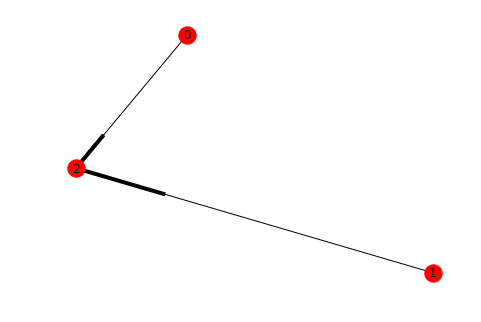

In [11]:
nx.draw(g4.to_networkx(), with_labels=True)
plt.show()

In [12]:
print(g4)
print(g4.ndata)
print(g4.edata)

DGLGraph(num_nodes=3, num_edges=2,
         ndata_schemes={'x': Scheme(shape=(5,), dtype=torch.float32)}
         edata_schemes={'y': Scheme(shape=(4,), dtype=torch.float32)})
{'x': tensor([[1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.]])}
{'y': tensor([[0., 0., 0., 0.],
        [1., 1., 1., 1.]])}


## Send Message

- DGLGraph.register_message_func(func)     ---- Register global message function.

- DGLGraph.send([edges, message_func]     ---- Send messages along the given edges

In [13]:
# Define the function for sending messages.
# The source nodes add 1 to their node features as the messages and send the messages to the destinations

def send_source(edges): return {'m': edges.src['x'] + 1}

In [14]:
# Set the function defined to be the default message function.
g4.register_message_func(send_source)

In [16]:
# Send messages through all edges.
g4.send(g4.edges())

In [17]:
print(g4.ndata)

{'x': tensor([[1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.]])}


##  Recieve  Message

Just like you need to go to your mailbox for retrieving mails, 
the destination nodes also need to receive the messages and potentially update their features.

- DGLGraph.register_reduce_func(func)     ---- Register global message reduce function.

- DGLGraph.recv([v, reduce_func, …])     ---- Receive and reduce incoming messages and update the features of node(s) v.

In [18]:
# Define a function for summing messages received and replacing the original feature.
def simple_reduce(nodes): return {'x': nodes.mailbox['m'].sum(1)}

In [22]:
# Set the function defined to be the default message reduce function.
g4.register_reduce_func(simple_reduce)

In [23]:
# All existing edges have node 2 as the destination.
# Receive the messages for node 2 and update its feature.
g4.recv(v=2)

C:\Users\Administrator\Anaconda3\lib\site-packages\dgl\base.py:18: UserWarning: Initializer is not set. Use zero initializer instead. To suppress this warning, use `set_initializer` to explicitly specify which initializer to use.
  warnings.warn(msg)


In [24]:
g4.ndata  # 3 = (1 + 1) + (0 + 1)

{'x': tensor([[1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0.],
        [3., 3., 3., 3., 3.]])}